# <p style="text-align: center;">MACHINE LEARNING AND STATISTICS PROJECT</p>

## <p style="text-align: center;">THE BOSTON HOUSE PRICES DATASET</p>

## <p style="text-align: center;">HUGH O'REILLY</p>

## <p style="text-align: center;">H.DIP Data Analytics GMIT</p>


## <span style="color:blue">INTRODUCTION</span>

 

___

The Boston Housing Dataset consists of information derived from US census data of housing in the Boston Mass. area of the US. 

The data was originally published by Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Ref [https://www.sciencedirect.com/science/article/abs/pii/0095069678900062%5D]

#TODO Insert image of boston

## <span style="color:blue">IMPORT AND SORT THE DATASET</span>


In [91]:
#IMPORT LIBRARIES

#Scipy Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

#IMPORT THE BOSTON HOUSE PRICES DATASET from sklearn
   
from sklearn.datasets import load_boston
boston = load_boston()

# Display the shape of the dataset
print(boston.data.shape)

# Ref [2]


(506, 13)


### <span style="color:blue">Investigate the Dataset type</span>

In [92]:
#Determine the dataset type

type(boston)

sklearn.utils.Bunch

The `type(boston)` command tells us that the dataset is a `sk.utils.Bunch` dataset type

A 'bunch' dataset type:  Dictionary-like object, the interesting attributes are: ‘data’, the data to learn, ‘target’, the classification labels, ‘target_names’, the meaning of the labels, ‘feature_names’, the meaning of the features, ‘DESCR’, the full description of the dataset, ‘filename’. 

Ref [https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html]

In [93]:
#Display a desciption of the dataset

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The Data consists of 506 rows and 13 columns i.e. 506 instances conatining 13 numeric/categorical variables as described above. 

In [94]:
# Show the first 10 rows of the Dataset
bos = pd.DataFrame(boston.data)
bos.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


It can be seen above that the dataset has no feature labels which will need to be added (although they are imported in the 'dataset characteristics'). In order to do so we need to use the `pandas.dataframe.keys()` command to access the keys and then assign them to the attribute columns.

Ref [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.keys.html]

In [95]:
# Identify the indices in the dataset

bos.keys()

RangeIndex(start=0, stop=13, step=1)

In [96]:
#Passing the `feature_names` parameter to the dataset now assigns the attributes with their labels

bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Only 13 attributes are shown, although 14 attributes are associated with the dataset. The 14th attribute, or target variable - MEDV     Median value of owner-occupied homes in $1000's must be added to the `bos` pandas array

In [97]:
#The price is identified as the target variable above so we will see if is there

boston.target #This prints the array of target variables (MEDV)

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [98]:
#We now add the target variable (MEDV) to the array as 'price'

bos['PRICE'] = boston.target
print(bos.head())

#ref [https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef]

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## <span style="color:blue">DESCRIPTIVE STATISTICS</span>

In [99]:
#Table with summary statistics of the dataset

bos.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


 **As can be seen in the above table, the target variable - 'PRICE' has a range of $5000 - $50000 with a mean of $22,532 which is a significant variation in house prices across the city.**

In [100]:
#Set the target variable to y

y = bos['PRICE']*1000

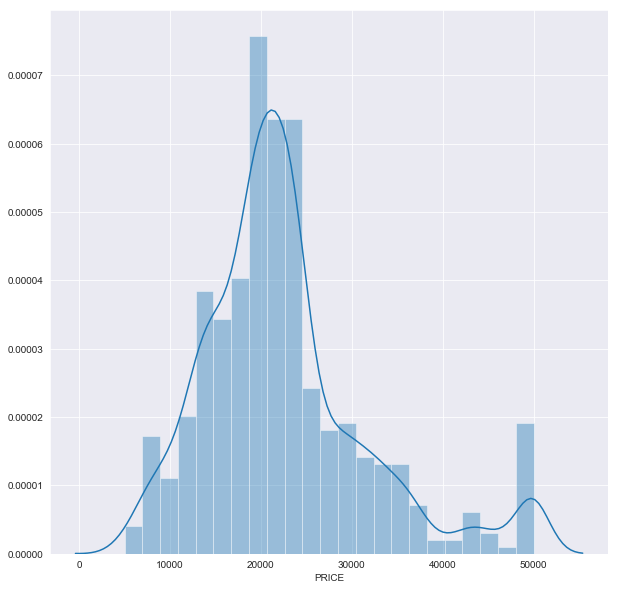

In [101]:
#Use the Seaborn library to display the distribution of house prices
sns.set_style("darkgrid")
plt.figure(figsize=(10, 10))
sns.distplot(y)

The plot above which displays the distribution of house prices in the dataset 'appears' to follow a normal distribution.

**Some other observations**

* The highest distribution is centred approximately around the mean ($20,000)

* There are a notably high number of houses around the max ($50,000)

Although the prices 'look' like they follow a normal distribution, it would be prudent to definitively determine the distribution as the distribution of the data will determine what inferential statistical analysis should be carried out.- we will next carry out a test for normality.